## NBA Top Scoring Trends
Josh Ottensoser, Ben Rapaport, Alexander Stadtmauer, Jacob Sternberg

12/21/16

Professor Lyon & Professor Coleman

Data Bootcamp - UG Fall 2016

December 2016

### Abstract


As NBA fans, the eye test over recent years has seemed to demonstrate a shift in player scoring with an increased emphasis on the 3 Pointer. With Stephen Curry as a poster child of this shift, having obliterated the record for most 3 Pointers scored in a single season, we felt the need to find out whether the eye test was true – that Steph was in fact part of a greater trend - or if he was just an outlier. Therefore, in our project, we aimed to uncover evidence for any sort of scoring trends as it relates to distance attempted. 

We accomplished this by retrieving data from basketball-reference.com and ESPN's database on the top 5 scorers from the past 15 years (ever since such data has been recorded). We used data of each season’s top 5 scorers rather than the league average for a few reasons: 1. Only individual player data rather than league-wide data is readily available for these metrics, 2. We see the top 5 scorers as proxies for scoring trends, as these are the players for whom offensive game planning revolves around; their attempts are  indicative of what NBA offenses are trying to accomplish, and 3. Examining actual players rather than faceless averages allows us to truly see the drivers behind the data, making it easy to  spot potential outliers rather than forcing us to guess whether certain players are driving the data.  

After compiling the data and analyzing the basic points per game statistics, we delved deeper into the reasons behind the trends by organizing the data in various informative charts and graphs. The graphics are powered by our arranging of investigative formulas, such as points per 36 minutes, HHI, and distance from the basket to determine exactly where the top NBA players are scoring from on the court.

The results of our research can be found in the charts and explanations below. They portray the changes that the NBA game has undergone and what the Association might trend towards in the future; however, we understand that the league is always shifting and adapting to new strategies and changes so we acknowledge that the current trends may not prevail for long.



In [1]:
##imports
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt         # pyplot module
%matplotlib inline                      
import datetime as dt                   # datetime module
import seaborn as sns                   # import seaborn module

##read the csv and save it as a dataframe
path = 'https://raw.githubusercontent.com/joshuaott3/DBProject/master/DBData.csv'
df= pd.read_csv(path)

##rename columns
df.columns=['Season','Name', 'Age','Team', 'League','Position','Games Played','Minutes Played', 'PPG','FGA','FG%','Average Shot Distance','%FGA 2P','%FGA 0-3','%FGA 3-10','%FGA 10-16','%FGA 16<3','%FGA 3P','FG% 2P','FG% 0-3','FG% 3-10','FG% 10-16','FG% 16<3','FG% 3P','%AST 2P','%FGA Dunks', 'Dunks Made','%ASTD 3P','%3PA Corner','3P% Corner', '3P Heaves Attempt','3P Heaves Made','OUT']

##drop column that isnt necessary
df = df.drop('OUT', 1)

##set season as the index
df = df.set_index('Season')

#drop the two rows that we do not need now (one row that is useless*, one redundant season row)
##*We got rid of this row by deleting the row that had the word 'Dunks' in the column 'Dunks Made' (the row we didn't want)
df=df.drop(['Season'])
df = df[df['Dunks Made'] != 'Dunks']

##Convert the appropriate rows from strings to floats
tofloats= ['Age','Games Played','Minutes Played', 'PPG','FGA','FG%','Average Shot Distance','%FGA 2P','%FGA 0-3','%FGA 3-10','%FGA 10-16','%FGA 16<3','%FGA 3P','FG% 2P','FG% 0-3','FG% 3-10','FG% 10-16','FG% 16<3','FG% 3P','%AST 2P','%FGA Dunks', 'Dunks Made','%ASTD 3P','%3PA Corner','3P% Corner']
for i in tofloats:
    df[i] = df[i].astype(float)
    
##Create variables that will be necesasry for proper weighting
df['FGA 2P']=df['%FGA 2P'] * df['FGA']
df['FGA 0-3']=df['%FGA 0-3'] * df['FGA']
df['FGA 3-10']=df['%FGA 3-10'] * df['FGA']
df['FGA 10-16']=df['%FGA 10-16'] * df['FGA']
df['FGA 16 <3']=df['%FGA 16<3'] * df['FGA']
df['FGA 3P']=df['%FGA 3P'] * df['FGA']

##Creates Minute per Game variable
df['MPG'] = df['Minutes Played']/df['Games Played']

##Creates Points per Minute variable
df['PPM']= (df['PPG']*df['Games Played'])/df['Minutes Played']

##Creats Points per 36 Minutes variable
df['PP36']=df['PPM']*36

##getting the average for each year, will be useful for PPG and MPG
mean_years=df.groupby(df.index).mean()


/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
##Checking to make sure the dataframe is there how we like it
df.head(5)

,Name,Age,Team,League,Position,Games Played,Minutes Played,PPG,FGA,FG%,...,3P Heaves Made,FGA 2P,FGA 0-3,FGA 3-10,FGA 10-16,FGA 16 <3,FGA 3P,MPG,PPM,PP36
Season,,,,,,,,,,,,,,,,,,,,,
2015-16,Stephen Curry,27.0,GSW,NBA,PG,79.0,2700.0,30.1,1598.0,0.504,...,2\,712.708,359.550,134.232,76.704,140.624,885.292,34.177215,0.880704,31.705333
2015-16,James Harden,26.0,HOU,NBA,SG,82.0,3125.0,29.0,1617.0,0.439,...,0\,960.498,397.782,200.508,169.785,194.040,656.502,38.109756,0.760960,27.394560
2015-16,LeBron James,31.0,CLE,NBA,SF,76.0,2709.0,25.3,1416.0,0.520,...,0\,1134.216,649.944,168.504,131.688,182.664,281.784,35.644737,0.709782,25.552159
2015-16,Kevin Durant,27.0,OKC,NBA,SF,72.0,2578.0,28.2,1381.0,0.505,...,0\,900.412,292.772,135.338,251.342,222.341,480.588,35.805556,0.787587,28.353142
2015-16,DeMarcus Cousins,25.0,SAC,NBA,C,65.0,2246.0,26.9,1332.0,0.451,...,0\,1121.544,479.520,380.952,46.620,214.452,210.456,34.553846,0.778495,28.025824


In [3]:
##Making sure all of the data is in the format we need 
##*There will be no need for 3-Point Heave data so we did not change it
df.dtypes

Name                      object
Age                      float64
Team                      object
League                    object
Position                  object
Games Played             float64
Minutes Played           float64
PPG                      float64
FGA                      float64
FG%                      float64
Average Shot Distance    float64
%FGA 2P                  float64
%FGA 0-3                 float64
%FGA 3-10                float64
%FGA 10-16               float64
%FGA 16<3                float64
%FGA 3P                  float64
FG% 2P                   float64
FG% 0-3                  float64
FG% 3-10                 float64
FG% 10-16                float64
FG% 16<3                 float64
FG% 3P                   float64
%AST 2P                  float64
%FGA Dunks               float64
Dunks Made               float64
%ASTD 3P                 float64
%3PA Corner              float64
3P% Corner               float64
3P Heaves Attempt         object
3P Heaves 

In [4]:
##Making sure the mean dataframe is there and how we'd like it
mean_years.tail(5)

,Age,Games Played,Minutes Played,PPG,FGA,FG%,Average Shot Distance,%FGA 2P,%FGA 0-3,%FGA 3-10,...,3P% Corner,FGA 2P,FGA 0-3,FGA 3-10,FGA 10-16,FGA 16 <3,FGA 3P,MPG,PPM,PP36
Season,,,,,,,,,,,,,,,,,,,,,
2011-12,25.8,61.4,2316.0,26.52,1225.4,0.4724,12.88,0.7944,0.2600,0.1536,...,0.3720,973.9336,312.0770,188.5060,197.4066,276.2368,251.4664,37.778565,0.701616,25.258163
2012-13,27.4,76.0,2895.2,27.36,1441.6,0.4850,13.38,0.7364,0.2748,0.1338,...,0.3518,1062.4448,391.7522,192.3648,192.6238,285.9748,379.1552,38.060730,0.719194,25.891001
2013-14,26.4,77.0,2916.0,27.60,1462.0,0.4870,13.90,0.6948,0.2678,0.1280,...,0.4252,1021.9350,383.7124,186.4180,197.5046,254.3000,440.0650,37.864913,0.728605,26.229768
2014-15,25.2,68.8,2448.8,25.86,1297.0,0.4712,11.10,0.8286,0.3522,0.1530,...,0.2238,1056.3142,452.0788,190.1542,160.4626,253.1496,240.6858,35.502540,0.728963,26.242660
2015-16,27.2,74.8,2671.6,27.90,1468.8,0.4838,13.04,0.6670,0.3004,0.1422,...,0.3408,965.8756,435.9136,203.9068,135.2278,190.8242,502.9244,35.658222,0.783506,28.206204


#### PPG

We first seek to examine whether or not there has been a trend in scoring patterns over the course of our dataset. in order to do so we take the average of each season and graph points statistics over time. The following graph shows the points per game trend for the top 5 scorers over our dataset.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None, None, None, None, None, None, None]

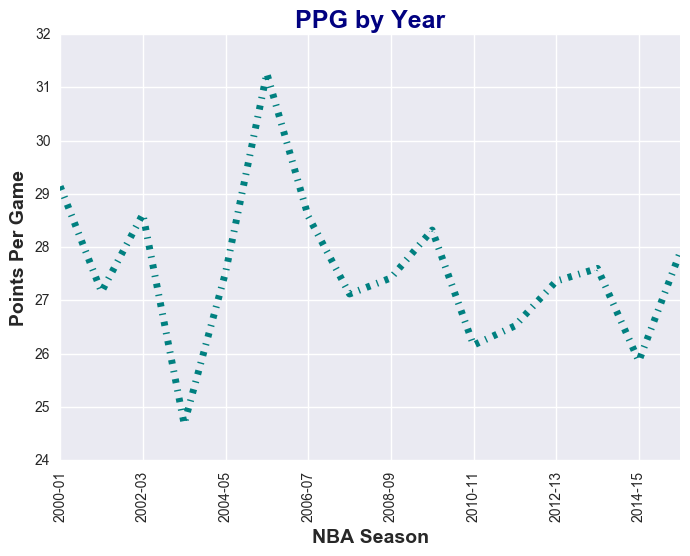

In [5]:
##set seaborn
sns.set()

##create subplot
fig, ax = plt.subplots() 

##plot out the PPG from mean years
mean_years['PPG'].plot(ax=ax,legend=None,color='teal', linewidth=5,ls='dashdot')

##title it, place the legend and decide the style
plt.title('PPG by Year', color='Navy',fontsize='18', fontweight='bold')

#sets label titles and style
ax.set_xlabel('NBA Season', fontsize='14', fontweight='bold')
ax.set_ylabel('Points Per Game', fontsize='14', fontweight='bold')

##gets labels
locs, labels = plt.xticks()

##sets rotation of the x labels
plt.setp(labels, rotation=90)

#### PPG to PP36

From our PPG graph above, we failed to make a conclusion one way or another as to what trend, if any, was occuring in the past 15 years. Therefore, we choose to delve deeper and to see if the minutes played per game have played a role as well.  

[None, None, None, None, None, None, None, None, None]

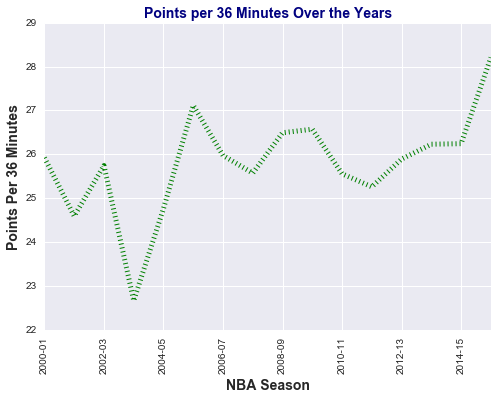

In [6]:
##set seaborn
sns.set()

##create subplot
fig, ax = plt.subplots()   

##plot Minutes Player per game from mean_years
mean_years['PP36'].plot(ax=ax,legend=None,color='green', linewidth=5, ls=':')

#title it
plt.title('Points per 36 Minutes Over the Years', color='Navy',fontsize='14', fontweight='bold')

##sets label titles and style
ax.set_xlabel('NBA Season', fontsize='14', fontweight='bold')
ax.set_ylabel('Points Per 36 Minutes', fontsize='14', fontweight='bold')


##gets labels
locs, labels = plt.xticks()

##sets rotation of the x labels
plt.setp(labels, rotation=90)

Here, we see that while points per game on a raw basis decreased, points per 36 minutes among the top scorers increased. This indicates to us that there is in fact a trend towards increased scoring efficiency. Now that we have established a trend of increased scoring efficiency, we seek to discover what is driving the increase in efficiency. 

#### Calculate HHI

We calculate HHI to determine whether concentration of shot type (by location) is a factor in increased socirng efficiency. 

HHI is a measure of how concentrated the distribution is. With our formula, the maximum HHI is 1. If a player shoots 100 shots and they are all in the 3-10 foot range, his HHI will be calculated as [(100 3-10 shots)/(100 total shots)]^2=1. Had this shooter taken 50 shots in the 3-10 foot range and 50 shots in the 10-16 foot range, his HHI would be calcualted as [(50 3-10 shots)/(100 total shots)]^2 + [(50 10-16 shots)/(100 total shots)]^2 = .5.

In [6]:
##create sum_years table, will be of use for everything else
sum_years=df.groupby(df.index).sum()

##create HHI column
sum_years['HHI']=0

##create list that will be vital for HHI calculation
HHI_list=['FGA 0-3','FGA 3-10', 'FGA 10-16', 'FGA 16 <3', 'FGA 3P']

##Create a for loop to get the HHI for each year
for i in HHI_list:
    sum_years['HHI']+=(sum_years[i]/sum_years['FGA'])**2
    
#create list that will be vital to determine shot distribution
FGA_list=['%FGA 0-3','%FGA 3-10','%FGA 10-16','%FGA 16<3','%FGA 3P']

##for loop that will give accurate number for percentage of shots on each location
        ##before, it was a sum of all of the players %, which made it greater than 1. We want the % of all of the players shots.
for i in range(0,5):
    sum_years[FGA_list[i]]=sum_years[HHI_list[i]]/sum_years['FGA'] 
    
##create MoreyBall column that will be sum of % of shots that are 0-3 feet and 3P
sum_years['MoreyBall']=sum_years['%FGA 0-3']+sum_years['%FGA 3P']


In [7]:
##Making sure the sum dataframe is there and how we'd like it
sum_years.tail(5)

,Age,Games Played,Minutes Played,PPG,FGA,FG%,Average Shot Distance,%FGA 2P,%FGA 0-3,%FGA 3-10,...,FGA 0-3,FGA 3-10,FGA 10-16,FGA 16 <3,FGA 3P,MPG,PPM,PP36,HHI,MoreyBall
Season,,,,,,,,,,,,,,,,,,,,,
2011-12,129.0,307.0,11580.0,132.6,6127.0,2.362,64.4,3.972,0.254674,0.153832,...,1560.385,942.530,987.033,1381.184,1257.332,188.892827,3.508078,126.290814,0.207403,0.459885
2012-13,137.0,380.0,14476.0,136.8,7208.0,2.425,66.9,3.682,0.271748,0.133438,...,1958.761,961.824,963.119,1429.874,1895.776,190.303648,3.595972,129.455003,0.218033,0.534758
2013-14,132.0,385.0,14580.0,138.0,7310.0,2.435,69.5,3.474,0.262457,0.127509,...,1918.562,932.090,987.523,1271.500,2200.325,189.324566,3.643023,131.148842,0.224249,0.563459
2014-15,126.0,344.0,12244.0,129.3,6485.0,2.356,55.5,4.143,0.348557,0.146611,...,2260.394,950.771,802.313,1265.748,1203.429,177.512698,3.644814,131.213299,0.230825,0.534128
2015-16,136.0,374.0,13358.0,139.5,7344.0,2.419,65.2,3.335,0.296782,0.138825,...,2179.568,1019.534,676.139,954.121,2514.622,178.291110,3.917528,141.031018,0.249948,0.639187


/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None, None, None, None, None, None, None]

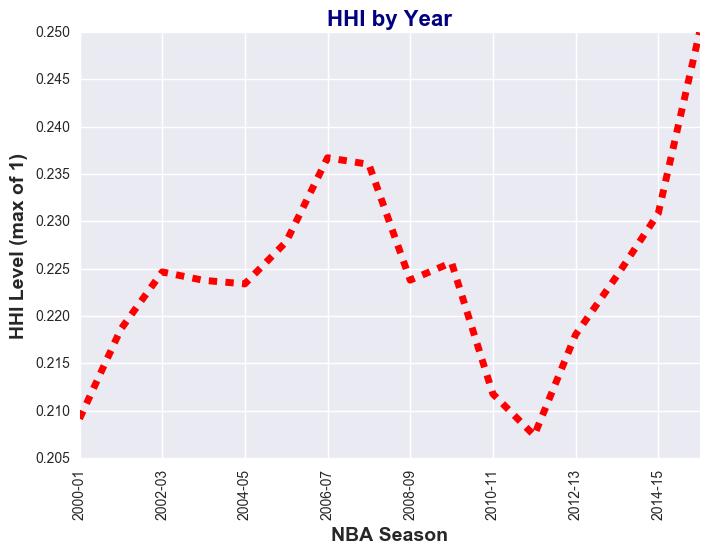

In [8]:
##set seaborn
sns.set()

##create subplot
fig, ax = plt.subplots()    

##plot out the HHI from sum_years
sum_years['HHI'].plot(ax=ax,legend=False,color='Red', linewidth=5,linestyle='--')

##title it and format
plt.title('HHI by Year', color='Navy',fontsize='16',fontweight='bold')

##Title y and x label and format
ax.set_ylabel('HHI Level (max of 1)',fontsize='14',fontweight='bold')
ax.set_xlabel('NBA Season',fontsize='14',fontweight='bold')

#gets labels
locs, labels = plt.xticks()

#sets rotation of the x labels
plt.setp(labels, rotation=90) 

As can be seen in the graph above, there has been a recent upward trend in HHI. This signifies to us that there is more concentration in where shots are being taken from, however, we are still unaware of where these shots are in fact coming from. It is clear players are choosing to shoot from the same locations more often, but where from?

#### Test 1: Average Shot Distance

Having established a recent upward trend in HHI, we would like to more closely examine which shot distance is being favored and is therefore leading to an increase in shot concentration. Our first test that we have chosen to conduct is to chart the average shot distance for the top 5 scorers over the years. Perhaps looking at the trend regarding what distance these players are shooting from will help us understand what changes have been made.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None, None, None, None, None, None, None]

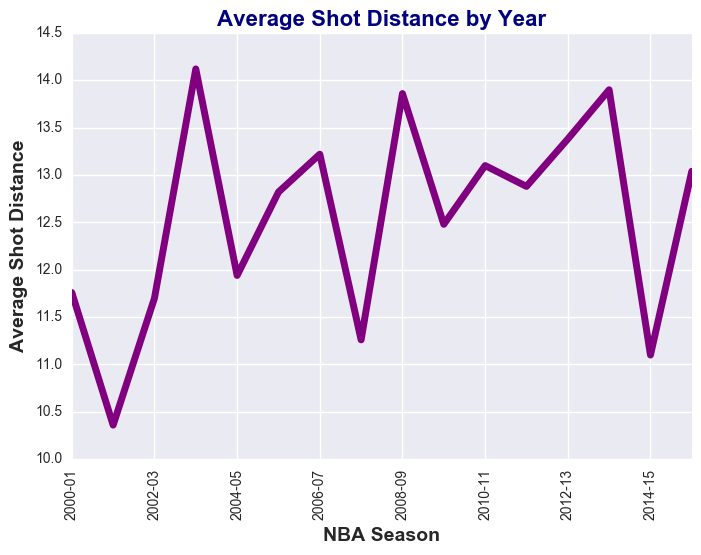

In [9]:
##set seaborn
sns.set()

##create subplot
fig, ax = plt.subplots()   

##plot Average Shot Distance from mean_years
mean_years['Average Shot Distance'].plot(ax=ax,legend=None,color='purple', linewidth=5, linestyle = 'solid')

##title it and format
plt.title('Average Shot Distance by Year', color='Navy',fontsize='16', fontweight='bold')

##title x and y label and format
ax.set_ylabel('Average Shot Distance',fontsize='14', fontweight='bold')
ax.set_xlabel('NBA Season',fontsize='14', fontweight='bold')

##gets labels
locs, labels = plt.xticks()

##sets rotation of the x labels
plt.setp(labels, rotation=90) 

#### Test 2: Shot Distribution

We had hypthesized that a shot concentration increase would be a result of a rise in concentration of 3 Pointers attempted, and that the average shot distance would therefore rise considerably. However, the data shows that the story is more complicated than that. Since the 2011-2012 season, the average shot distance has hardly risen. This means that if 3 Pointers attempted has increased, close-range shots may have also increased to counterbalance the effect of more 3 Pointers attempted. 

We will further examine the breakdown of shots attempted by distance type in order to see why exactly the average shot ditance has not changed despite our perception of an increase in 3 Pointers.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None, None, None, None, None, None, None]

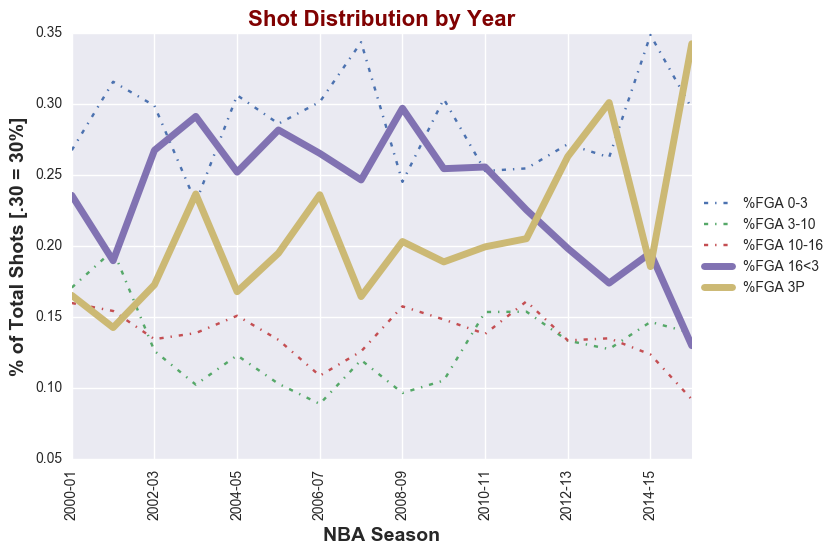

In [10]:
##Set seaborn
sns.set()

##create a subplot
fig, ax = plt.subplots()  

##plot the %FGA from each distance (with seperate linewidths for 16<3 and 3P)
sum_years[['%FGA 0-3','%FGA 3-10','%FGA 10-16']].plot(ax=ax,ls='-.')
sum_years[['%FGA 16<3', '%FGA 3P']].plot(ax=ax,linewidth=5)


##title it and format
plt.title('Shot Distribution by Year', color='Maroon',fontsize='16',fontweight='bold')

#title x and y label and format
ax.set_ylabel('% of Total Shots [.30 = 30%]',fontsize='14',fontweight='bold')
ax.set_xlabel('NBA Season',fontsize='14',fontweight='bold')

##place legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##gets labels
locs, labels = plt.xticks()

##sets rotation of the x labels
plt.setp(labels, rotation=90)

Looking closely at this graph, we can see that 3 Pointers and FGA 0-3 have both been on the rise, with these shot locations dominated the league in 2015-2016 (combined ~65% of total shots). 

Additionally, this graph can further help explain why the average shot distance has not changed much. The most diminishing shot type is FGA 16 < 3. Because the effect we are seeing essentially replaces  FGA 16 < 3 with 3 Pointers on a percentage basis, and because these two shot types are close in distance, the average distance does not change much (especially being coupled with the increase in FGA 0-3). 

We'd like to crystalize this trend towards layups and 3 Pointers in a visual that focuses on displaying the prominence of these two shot forms.

#### Test 3: MoreyBall

In this graph, we examine the proportion of the total field goal attempts of the top 5 scorers that have come from 0-3 ft. away from the hoop and beyond the 3 point line. 'Moreyball' gets its name from Houston Rockets General Manager Daryl Morey, who popularized the theory that long-range two-pointers are the least efficient shots in the game, and therefore pushes his team to shoot from only 0-3 ft or 3P (~70% of their shots in recent years).

This graph shows a generally positive trend in Moreyball even since 2000 but especially since 2011-2012 - right around where we saw HHI take off. 

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None, None, None, None, None, None, None]

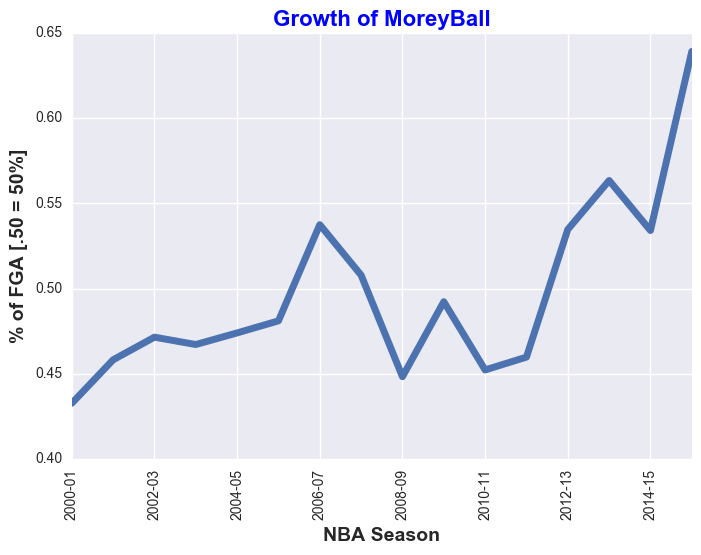

In [11]:
##set seaborn
sns.set()

##create subplot
fig, ax = plt.subplots()   

##plot Moreyball from sum_years
sum_years['MoreyBall'].plot(ax=ax,legend=False, linewidth=5)

##title it
plt.title('Growth of MoreyBall', color='Blue', fontsize='16',fontweight='bold')

##title x and y label
ax.set_ylabel('% of FGA [.50 = 50%]',fontsize='14',fontweight='bold')
ax.set_xlabel('NBA Season',fontsize='14',fontweight='bold')

#gets labels
locs, labels = plt.xticks()

#sets rotation of the x labels
plt.setp(labels, rotation=90) 

To further look into this trend and how much the game has changed, we will now show two pie charts side by side that will display how shot location has changed since the 2000-2001 season compared to the 2015-2016 season. Anyone who watches basketball knows that they are watching a different game today than they had 15 years ago, but how different has it become? The results below tell a shocking tale.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


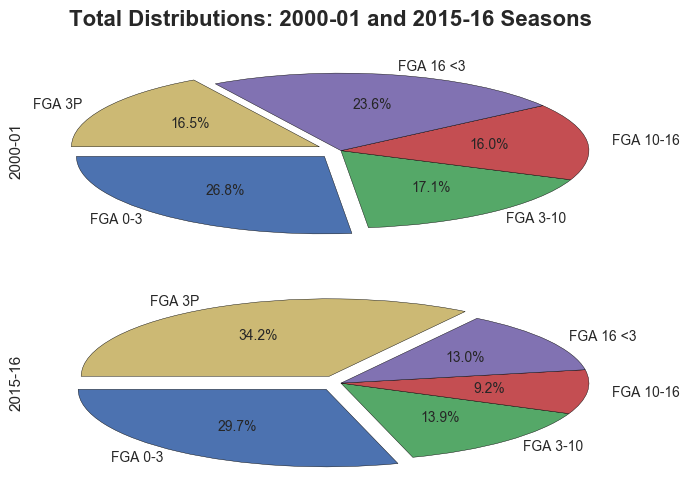

In [12]:
##Set seaborn
sns.set()

##create subplots
fig, ax = plt.subplots(2)

##create an explode list to we can seperate 0-3 and 3P from the pie chart
explode = (0.1, 0, 0, 0,0.1)

##create a dataframe that only has the data from 2000-2001
twothousand=mean_years.loc['2000-01']

##only keep the data we want here (using the HHI list we made earlier)
twothousand=twothousand[HHI_list]

##plot it as a pie chart on the top plot (and set a startangle that we prefer, and display percentage breakdown)
twothousand.plot(ax=ax[0],kind='pie',legend=None,autopct='%1.1f%%',explode=explode, startangle=180)

##supertitle it
fig.suptitle('Total Distributions: 2000-01 and 2015-16 Seasons', fontsize='16', fontweight='bold')

##create a dataframe that only has the data from 2015-2016
twothousandfifteen=mean_years.loc['2015-16']

##only keep the data we want here (using the HHI list we made earlier)
twothousandfifteen=twothousandfifteen[HHI_list]

##plot it as a pie chart (and set a startangle that we prefer)
twothousandfifteen.plot(ax=ax[1],kind='pie',autopct='%1.1f%%',explode=explode,startangle=180)

As you can clearly see, over this time frame, the percentage of 3 Pointers attempted has more than doubled and FGA 16 < 3 has more than halved. Other 2-pointers - FGA 10-16 and FGA 3-10 - have also decreased while FGA 0-3 has risen and has continued to be a critical component of the game. 

We now know that while HHI and Moreyball have been on a pretty straightforward upward trend since 2011-2012, the new millennium before that season appears to have been far more volitile. This may mean that the trend has not been around as long as this side-by-side analysis might lead one to believe. 

What is clear, however, is that the game of basketball has changed dramtically over the years, and the league is clearly beginning to catch on to something.

### Conclusion

Ultimately, after analyzing the results from the PPG, PP36, HHI, shot distance, shot distribution, and specialized shot distribution, we have come to the conclusion that while it has taken the league some time to figure out, the NBA has ultimately seen a clear shift away from shots in the midrange, a doubling of 3 Pointers attempted, and an increase in layups / dunks as well. This seems to strengthen Daryl Morey's argument.

Our findings from the HHI make it clear that fewer shot types are responsible for most of the total shots among the tops scorers in the league. Our pie charts and distance graphs prove that this must be from a spike in 3 Pointers at the expense of long 2 Pointers, along with an increase in layups / dunks. This comes together to strengthen our original hypothesis that the league truly is searching for an edge in efficiency with its shot selection. Top scorers are playing fewer minutes and scoring just as many points as in the past. 

It is important to point out that our data set is limited and one way of making this report more efficient is an increase of data points. Taking the top 10 or 15 scorers per season, compared to top 5, would likely yield different results and we wonder how different our conclusion would be. Although we found a trend in our project, we know that our limited data set of top 5 scorers per season could have been stronger had we retrieved more data points. For example, in the last season, the immense 3-point tendency in Stephen Curry had a significant pull on the season’s data which played  a large role in our project, Increasing our data would relieve the dependency on a single player's statistics. 

So Moreyball is on the rise, but has it proven to be a winning strategy on a team level? As a preliminary step towards where our analysis may lead researchers next, the data seems to show that since Moreyball has been on the rise, the top scorers with the lowest Moreyball scores are increasingly showing up on better teams: 

-In 2015-2016, Demarcus Cousins scored lowest on the Moreyball scale. His team did in fact have the fewest wins of the five, and was the only of the season's top 5 scorers to fail to make the playoffs. 

-In 2014-2015, Cousins, Anthony Davis and Russell Westbrook scored the lowest and their teams also had the three fewest wins of the five. 

-In 2013-2014, Carmelo Anthony's Moreyball score was the lowest and his team's wins were the lowest. 

-In 2012-2013, the data is scattered.

-In 2011-2012 the lower Moreyball scores actually appear on teams with more wins, with the highest of the season, Kevin Love, appearing on by far the least winning team.

We are ultimately left with the question of whether Moreyball is peaking or whether the league will catch on and reverse the trend outlined above. As technology and advanced statistics increasingly proliferate the Association, we predict that this current flourishing of exciting and smart basketball will continue in the near-term and evolve to account for counter-strategies and newly found evidence in the long-term. We look forward to see where the leading basketball minds of our time take the game next. 

